# Using Calculation Setups

Calculation setups are a way to efficiently do LCA calculations for multiple functional units and methods at the same time.

This notebook builds on the `Getting started with Brightway2` notebook, and won't work if you haven't done that notebook yet.

In [1]:
from brightway2 import *

In [2]:
if "Calculation setups" not in projects:
    projects.current = "BW2 introduction"
    projects.copy_project("Calculation setups")
else:
    projects.current = "Calculation setups"

## Defining a calculation setup

A calculation setups is defined by three things:
* A name
* A list of functional units
* A list of LCIA methods

In this example, we will choose both activities and methods at random.

In [3]:
functional_units = [{Database('forwast').random(): 1} for _ in range(20)]

We can't choose methods completely at random, though, as the `forwast` database doesn't have as many biosphere flows as ecoinvent, so many methods will only characterize flows that aren't provided anywhere in `forwast`. So lets only choose from the methods which will have a non-zero LCA score:

In [4]:
import random

all_forwast_flows = {exc.input for ds in Database("forwast") for exc in ds.biosphere()}
suitable_methods = [method 
                    for method in methods 
                    if {cf[0] for cf in Method(method).load()}.intersection(all_forwast_flows)]

print("Can use {} of {} LCIA methods".format(len(suitable_methods), len(methods)))
chosen_methods = random.sample(suitable_methods, 8)

Can use 306 of 665 LCIA methods


A calculation setup is a normal Python dictionary, with keys `inv` and `ia`, for the functional units and LCIA methods, respectively.

In [5]:
my_calculation_setup = {'inv': functional_units, 'ia': chosen_methods}

You define a calculation setup by name in the metadata store `calculation_setups`, similar to the way that LCIA methods are defined.

In [6]:
calculation_setups['some random stuff'] = my_calculation_setup

We can examine what we have just randomly created:

In [7]:
calculation_setups['some random stuff']

{'ia': [('EDIP2003 w/o LT', 'global warming w/o LT', 'GWP 100a w/o LT'),
  ('EDIP', 'environmental impact', 'global warming, GWP 100a'),
  ('EDIP2003 w/o LT',
   'eutrophication w/o LT',
   'terrestrial eutrophication w/o LT'),
  ('ReCiPe Endpoint (H,A) w/o LT', 'total w/o LT', 'total w/o LT'),
  ('IMPACT 2002+ (Endpoint)', 'ecosystem quality', 'total'),
  ('EDIP2003 w/o LT', 'human toxicity w/o LT', 'via soil w/o LT'),
  ('ReCiPe Midpoint (H) w/o LT', 'climate change w/o LT', 'GWP100 w/o LT'),
  ('EDIP2003 w/o LT', 'global warming w/o LT', 'GWP 500a w/o LT')],
 'inv': [{'_82 Wholesale trade, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003']): 1},
  {'_16 Sand, gravel and stone from quarry, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
  {'_29 Textiles, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
  {'_80 Infrastructure, excluding buildings, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003']): 1},
  {'116 Waste treatment, Landfill of waste, Textiles, DK' (kilo

The normal create, update, and delete machanisms apply:
* To create a new calculation setup, assign by name, as in cell above
* To replace a calculation setup, just assign new data, i.e. `calculation_setups['some random stuff'] = some_new_stuff`.
* To delete a calculation setup, use `del`, i.e. `del calculation_setups['some random stuff']`.

## Using a calculation setup

Use the `MultiLCA` class to get LCA results for a calculation setup. Note that this class does all the calculations as soon as you create it.

In [8]:
mlca = MultiLCA('some random stuff')

In [9]:
mlca.results

array([[  4.00177818e-01,   4.00177818e-01,   3.84578730e-02,
          3.53608645e-02,   6.66150487e-07,   3.70723285e-03,
          3.95235403e-01,   3.75064977e-01],
       [  7.46790333e-03,   7.46790333e-03,   5.81172620e-04,
          6.58034736e-04,   1.06614413e-08,   6.35962942e-05,
          7.39705358e-03,   7.24627173e-03],
       [  8.60137687e+00,   8.60137687e+00,   6.89937280e-01,
          8.18896400e-01,   1.14550467e-05,   5.27938253e-02,
          8.54591539e+00,   7.89153779e+00],
       [  1.09537639e+00,   1.09537639e+00,   6.91077065e-02,
          9.69665563e-02,   1.24224179e-06,   6.81884029e-03,
          1.08480655e+00,   1.06241801e+00],
       [  9.32652133e-01,   9.32652133e-01,   5.08693103e-03,
          4.86878431e-02,   9.06733139e-08,   4.92670746e-04,
          1.01043189e+00,   3.05736725e-01],
       [  3.43428957e-01,   3.43428957e-01,   1.34351899e-02,
          1.75665510e-01,   2.69107423e-07,   1.45173729e-03,
          3.46865502e-01,   2.9

## Visualizing the results

There isn't any code built into Brightway2 yet, but [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html) has some great visualizations for this type of result array.

In [10]:
%matplotlib inline

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Text xticklabel objects>)

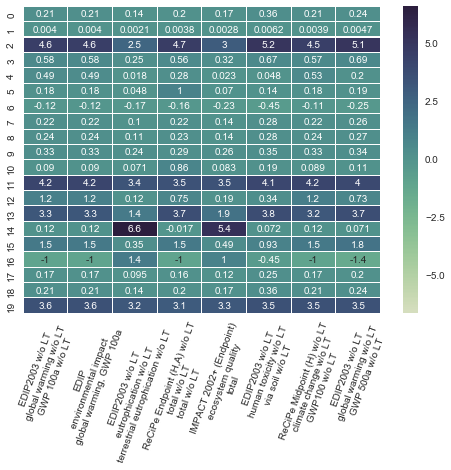

In [18]:
# From https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True) 

sns.heatmap(
    mlca.results / np.average(mlca.results, axis=0), # Normalize to get relative results
    annot=True, 
    linewidths=.05, 
    cmap=cmap, 
    xticklabels=["\n".join(x) for x in mlca.methods]
)
plt.xticks(rotation=70) 

Could also adapt https://stanford.edu/~mwaskom/software/seaborn/examples/structured_heatmap.html, but this is more work.